In [1]:
# pip install faker
import pandas as pd
import numpy as np
from faker import Faker
import random

In [2]:
# Initialize Faker
fake = Faker()

In [3]:
# Generate data
num_records = 1000
data = {
    'Product ID': [fake.uuid4() for _ in range(num_records)],
    'Category': [random.choice(['Electronics', 'Clothing', 'Home', 'Books', 'Toys']) \
                 for _ in range(num_records)],
    'Price': [round(random.uniform(5, 500), 2) for _ in range(num_records)],
    'Date of Purchase': [fake.date_this_decade() for _ in range(num_records)],
    'Customer ID': [fake.uuid4() for _ in range(num_records)],
    'Location': [fake.city() for _ in range(num_records)],
    'Payment Method': [random.choice(['Credit Card', 'PayPal', 'Bank Transfer', 'Cash']) \
                  for _ in range(num_records)]
}

In [4]:
# Create DataFrame
df = pd.DataFrame(data)

In [5]:
df.shape

(1000, 7)

In [6]:
df.to_csv("sales.csv")

In [7]:
import matplotlib.pyplot as plt

In [11]:
# Ensure 'Date of Purchase' is in datetime format
df1 = df.copy()
df1['Date of Purchase'] = pd.to_datetime(df1['Date of Purchase'])

# Set 'Date of Purchase' as the index
df1.set_index('Date of Purchase', inplace=True)
df1

,Product ID,Category,Price,Customer ID,Location,Payment Method
Date of Purchase,,,,,,
2024-10-22,1acfc7fa-df8f-4672-ad26-72fe1f9de31d,Home,474.58,e536e33f-59c0-4dab-bd02-cdbec6cc21eb,Kellifort,Credit Card
2022-04-01,f1f503ca-a674-417a-9571-f781fab907b9,Toys,380.13,5c290f25-1dee-4ad5-ae16-50a6d79cfbe2,Kimberlyberg,Bank Transfer
2023-05-23,162e1427-8a7d-425e-b98c-a14d5e09c989,Toys,208.62,2c7a3388-2fec-42d7-aeb2-731f39d45c87,Lefort,Bank Transfer
2025-01-30,3a006b67-19e4-437d-ba81-3d55b1e6c1ca,Clothing,42.80,2947d4c4-237a-4166-adb2-25d1f4fe8969,Port Josephville,Credit Card
2023-05-06,2b1a5747-18b8-46cb-8337-31c6f99f8a04,Toys,6.37,bbc98ce6-e23a-48a9-b763-9e5c12f41d8f,Jessicamouth,Credit Card
...,...,...,...,...,...,...
2022-07-09,5e89a38e-44b9-4c1c-80cd-0a90cafdd08a,Electronics,298.88,ac850090-3540-4e3e-82db-c7383e03f140,Lake Evantown,PayPal
2025-02-10,d8b687b6-36a6-416b-89ec-731b4881b845,Books,98.71,bbae1aba-9eab-4b0f-8029-249ada9f51fb,Veronicaview,Cash
2022-01-03,dda7a5fc-4add-4e74-a3e7-ffc81b920cd6,Books,144.38,c523ed26-1df6-408b-9738-13d3179ec089,South Aliciaville,Bank Transfer


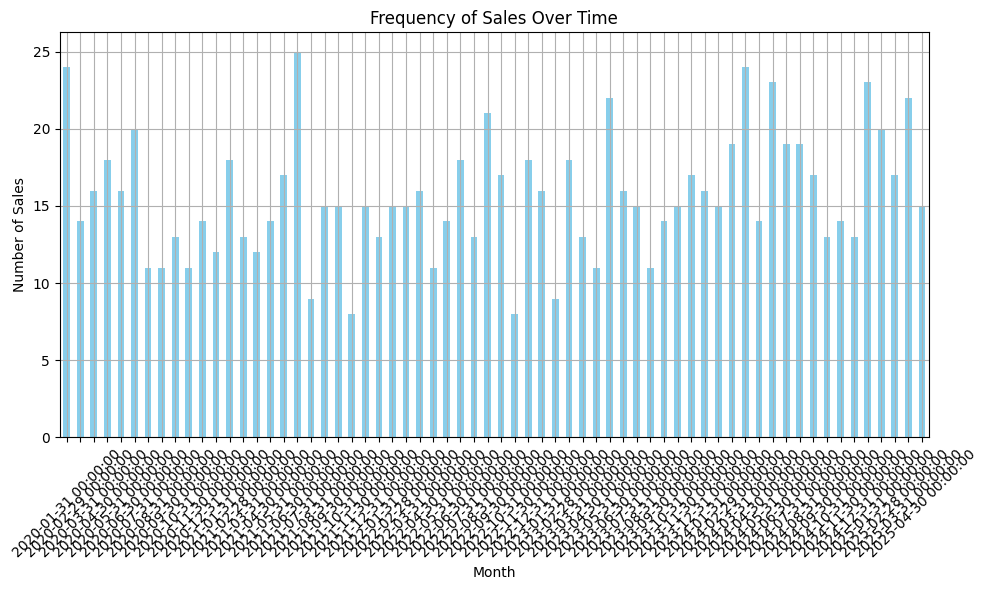

In [13]:
# Group by month and count the number of sales
sales_frequency = df1.resample('M').size()

# Plot the data
plt.figure(figsize=(10, 6))
sales_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Ensure 'Date of Purchase' is in datetime format
df2 = df.copy()
df2['Date of Purchase'] = pd.to_datetime(df2['Date of Purchase'])

# Set 'Date of Purchase' as the index
df2.set_index('Date of Purchase', inplace=True)

In [15]:
annual_revenues = df2.resample('YE').sum()

ValueError: Invalid frequency: YE

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
annual_revenues['Price'].plot(kind='bar', color='skyblue')
plt.title('Annual Gross Total Sales Revenues')
plt.xlabel('Year')
plt.ylabel('Total Sales Revenues')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()